<a href="https://colab.research.google.com/github/RenanNB360/Visao_Computacional_Colab/blob/main/Classifica%C3%A7%C3%A3o_de_Emo%C3%A7%C3%B5es/classificacao_de_emocoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações das bibliotecas

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

# Carregamento das imagens

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Projects Computing Vision/Classificação_de_Emoções/arquivo/fer_images.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

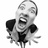

In [ ]:
tf.keras.preprocessing.image.load_img('/content/fer2013/train/Angry/1003.jpg')

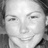

In [ ]:
tf.keras.preprocessing.image.load_img('/content/fer2013/train/Happy/1.jpg')

# Bases de treinamento e teste

In [ ]:
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2)
dataset_treinamento = gerador_treinamento.flow_from_directory('/content/fer2013/train',
                                                              target_size = (48,48),
                                                              batch_size = 16,
                                                              class_mode = 'categorical',
                                                              shuffle = True)

Found 28709 images belonging to 7 classes.


In [ ]:
np.unique(dataset_treinamento.classes, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

In [ ]:
dataset_treinamento.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

<Axes: ylabel='count'>

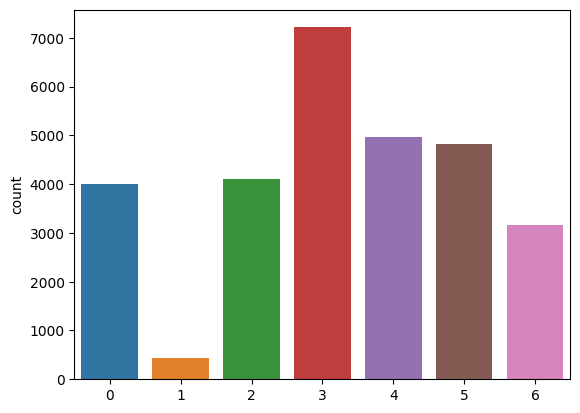

In [ ]:
sns.countplot(x = dataset_treinamento.classes)

In [ ]:
gerador_teste = ImageDataGenerator(rescale = 1./255)
dataset_teste = gerador_teste.flow_from_directory('/content/fer2013/validation',
                                                  target_size = (48,48),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 3589 images belonging to 7 classes.


In [ ]:
np.unique(dataset_teste.classes, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([491,  55, 528, 879, 626, 594, 416]))

# Cosntrução e treinamento de rede neural

In [ ]:
numero_detectores = 32
numero_classes = 7
largura, altura = 48, 48
epocas = 70

network = Sequential()
network.add(Conv2D(filters=numero_detectores, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape=(largura, altura, 3)))
network.add(BatchNormalization())
network.add(Conv2D(filters=numero_detectores, kernel_size = (3,3), activation = 'relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters=(2 * numero_detectores), kernel_size = (3,3), activation = 'relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(filters=(2 * numero_detectores), kernel_size = (3,3), activation = 'relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters=(2 * 2 * numero_detectores), kernel_size = (3,3), activation = 'relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(filters=(2 * 2 * numero_detectores), kernel_size = (3,3), activation = 'relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters=(2 * 2 * 2 * numero_detectores), kernel_size = (3,3), activation = 'relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(filters=(2 * 2 * 2 * numero_detectores), kernel_size = (3,3), activation = 'relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(units= (2 * numero_detectores), activation = 'relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(units = numero_classes, activation = 'softmax'))
print(network.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                        

In [ ]:
network.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
network.fit(dataset_treinamento, epochs = epocas)

Epoch 1/70
1795/1795 [==============================] - 67s 28ms/step - loss: 1.7296 - accuracy: 0.3228
Epoch 2/70
1795/1795 [==============================] - 50s 28ms/step - loss: 1.4164 - accuracy: 0.4562
Epoch 3/70
1795/1795 [==============================] - 49s 27ms/step - loss: 1.3155 - accuracy: 0.5005
Epoch 4/70
1795/1795 [==============================] - 50s 28ms/step - loss: 1.2521 - accuracy: 0.5264
Epoch 5/70
1795/1795 [==============================] - 46s 26ms/step - loss: 1.2156 - accuracy: 0.5471
Epoch 6/70
1795/1795 [==============================] - 47s 26ms/step - loss: 1.1665 - accuracy: 0.5650
Epoch 7/70
1795/1795 [==============================] - 49s 27ms/step - loss: 1.1378 - accuracy: 0.5753
Epoch 8/70
1795/1795 [==============================] - 46s 26ms/step - loss: 1.1097 - accuracy: 0.5886
Epoch 9/70
1795/1795 [==============================] - 47s 26ms/step - loss: 1.0827 - accuracy: 0.5982
Epoch 10/70
1795/1795 [==============================] - 48s 27m

# Salvar e carregar a rede neural

In [ ]:
model_json = network.to_json()
with open('network_emotions.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
!mv /content/network_emotions.json /content/drive/MyDrive/Projects\ Computing\ Vision/Classificação_de_Emoções/arquivo

In [ ]:
from keras.models import save_model
network_saved = save_model(network, '/content/drive/MyDrive/Projects Computing Vision/Classificação_de_Emoções/arquivo/weights_emotions.hdf5')

In [ ]:
with open('/content/drive/MyDrive/Projects Computing Vision/Classificação_de_Emoções/arquivo/network_emotions.json','r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 48, 48, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization", "trainable": true, "dtype": "float32", "axis": [3], "momentum": 0.99, "epsilon": 0.001, "c

In [ ]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('/content/drive/MyDrive/Projects Computing Vision/Classificação_de_Emoções/arquivo/weights_emotions.hdf5')
network_loaded.compile(loss= 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                        

# Avaliação da rede neural

In [ ]:
network_loaded.evaluate(dataset_teste)

3589/3589 [==============================] - 25s 5ms/step - loss: 1.6169 - accuracy: 0.5901


[1.6168835163116455, 0.5901365280151367]

In [ ]:
previsoes = network_loaded.predict(dataset_teste)
previsoes

3589/3589 [==============================] - 22s 6ms/step


array([[4.6355581e-01, 4.3696547e-03, 1.7055912e-01, ..., 4.0034350e-02,
        3.0706167e-01, 1.3329465e-02],
       [8.1408668e-01, 1.6472115e-05, 1.7832012e-01, ..., 4.9441756e-04,
        1.4089737e-03, 5.0414335e-03],
       [9.6447688e-01, 5.8731989e-06, 2.7267020e-02, ..., 2.1865130e-04,
        7.8437887e-03, 1.6754595e-05],
       ...,
       [2.2669684e-04, 3.5186093e-07, 6.5129116e-02, ..., 2.1173517e-04,
        3.5421841e-04, 9.3385559e-01],
       [2.3660692e-03, 2.5984411e-06, 3.3034605e-01, ..., 2.2274698e-03,
        5.9096952e-04, 6.6380906e-01],
       [4.3718657e-03, 5.3399752e-05, 2.0247133e-01, ..., 5.9111160e-03,
        7.2213635e-03, 7.7076048e-01]], dtype=float32)

In [ ]:
previsoes = np.argmax(previsoes, axis = 1)
previsoes

array([0, 0, 0, ..., 6, 6, 6])

In [ ]:
dataset_teste.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
from sklearn.metrics import *
accuracy_score(dataset_teste.classes, previsoes)

0.5901365282808582

In [ ]:
dataset_teste.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
cm = confusion_matrix(dataset_teste.classes, previsoes)
cm

array([[295,   5,  59,  16,  49,  57,  10],
       [  8,  38,   4,   1,   2,   2,   0],
       [ 55,   3, 273,  15,  59,  75,  48],
       [ 15,   1,  17, 768,  41,  21,  16],
       [ 86,  11, 110, 155, 108,  95,  61],
       [ 45,   1,  90,  27, 118, 305,   8],
       [  7,   0,  43,  19,   9,   7, 331]])

<Axes: >

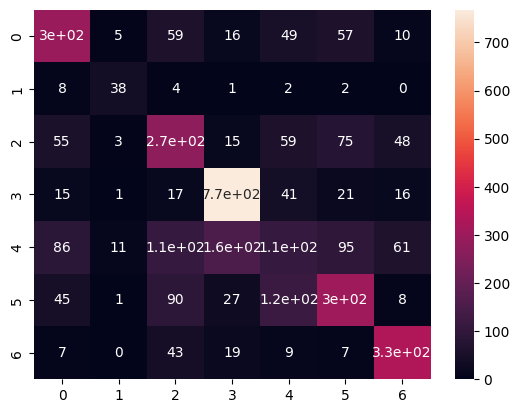

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59       491
           1       0.64      0.69      0.67        55
           2       0.46      0.52      0.49       528
           3       0.77      0.87      0.82       879
           4       0.28      0.17      0.21       626
           5       0.54      0.51      0.53       594
           6       0.70      0.80      0.74       416

    accuracy                           0.59      3589
   macro avg       0.57      0.59      0.58      3589
weighted avg       0.56      0.59      0.57      3589



# Classificação de uma única imagem

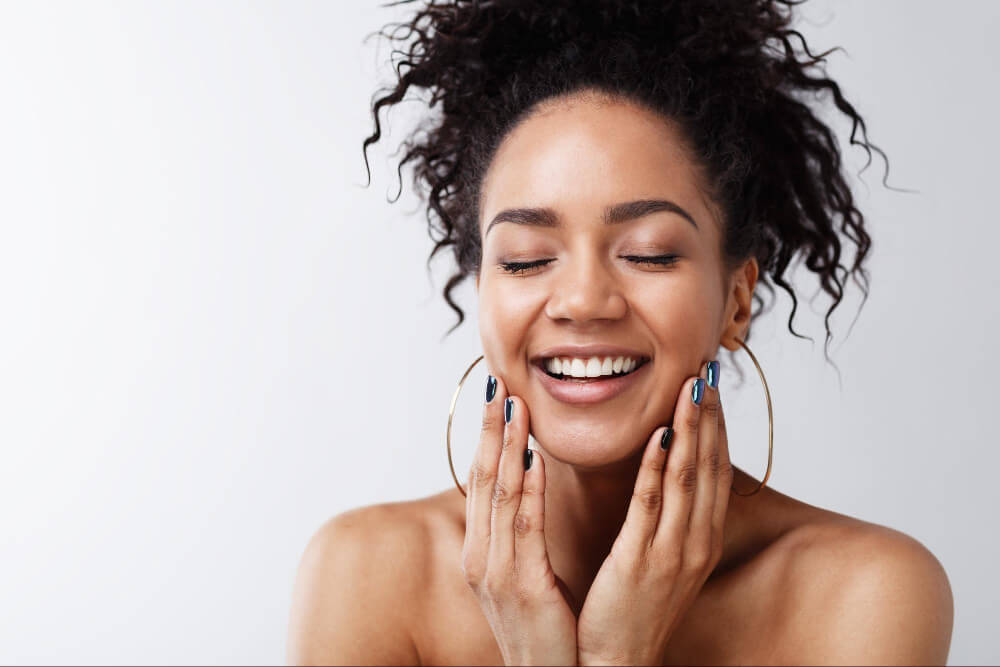

In [ ]:
imagem = cv2.imread('/content/drive/MyDrive/Projects Computing Vision/Classificação_de_Emoções/arquivo/Imagens_videos/imagem.jpg')
cv2_imshow(imagem)

In [ ]:
imagem.shape

(667, 1000, 3)

In [ ]:
detector_face = cv2.CascadeClassifier('/content/drive/MyDrive/Projects Computing Vision/Classificação_de_Emoções/arquivo/haarcascade_frontalface_default.xml')

In [ ]:
imagem_original = imagem.copy()
deteccoes = detector_face.detectMultiScale(imagem_original)

In [ ]:
deteccoes

array([[419, 107, 333, 333]], dtype=int32)

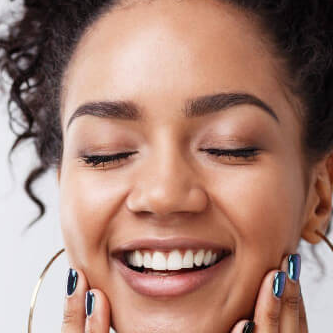

In [ ]:
roi = imagem[107:107 + 333, 419:419 + 333]
cv2_imshow(roi)

In [ ]:
roi.shape

(333, 333, 3)

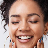

In [ ]:
roi = cv2.resize(roi, (48,48))
cv2_imshow(roi)

In [ ]:
roi.shape

(48, 48, 3)

In [ ]:
roi

array([[[228, 222, 223],
        [211, 209, 209],
        [203, 196, 198],
        ...,
        [ 18,  16,  22],
        [  6,   5,   7],
        [  9,   7,  13]],

       [[207, 201, 202],
        [182, 176, 177],
        [187, 182, 181],
        ...,
        [ 16,  15,  17],
        [ 10,   8,  15],
        [  8,   7,   9]],

       [[181, 175, 177],
        [186, 179, 182],
        [171, 167, 173],
        ...,
        [ 13,  11,  16],
        [ 11,   9,  15],
        [  4,   3,   5]],

       ...,

       [[239, 234, 233],
        [238, 233, 232],
        [238, 233, 232],
        ...,
        [223, 218, 217],
        [222, 217, 216],
        [221, 216, 215]],

       [[239, 233, 234],
        [238, 233, 232],
        [238, 233, 232],
        ...,
        [223, 218, 217],
        [222, 217, 216],
        [222, 217, 216]],

       [[238, 233, 232],
        [238, 233, 232],
        [238, 233, 232],
        ...,
        [222, 217, 216],
        [222, 217, 216],
        [222, 217, 216]]

In [ ]:
roi = roi / 255
roi

array([[[0.89411765, 0.87058824, 0.8745098 ],
        [0.82745098, 0.81960784, 0.81960784],
        [0.79607843, 0.76862745, 0.77647059],
        ...,
        [0.07058824, 0.0627451 , 0.08627451],
        [0.02352941, 0.01960784, 0.02745098],
        [0.03529412, 0.02745098, 0.05098039]],

       [[0.81176471, 0.78823529, 0.79215686],
        [0.71372549, 0.69019608, 0.69411765],
        [0.73333333, 0.71372549, 0.70980392],
        ...,
        [0.0627451 , 0.05882353, 0.06666667],
        [0.03921569, 0.03137255, 0.05882353],
        [0.03137255, 0.02745098, 0.03529412]],

       [[0.70980392, 0.68627451, 0.69411765],
        [0.72941176, 0.70196078, 0.71372549],
        [0.67058824, 0.65490196, 0.67843137],
        ...,
        [0.05098039, 0.04313725, 0.0627451 ],
        [0.04313725, 0.03529412, 0.05882353],
        [0.01568627, 0.01176471, 0.01960784]],

       ...,

       [[0.9372549 , 0.91764706, 0.91372549],
        [0.93333333, 0.91372549, 0.90980392],
        [0.93333333, 0

In [ ]:
roi.shape

(48, 48, 3)

In [ ]:
roi = np.expand_dims(roi, axis = 0)
roi.shape

(1, 48, 48, 3)

In [ ]:
probs = network_loaded.predict(roi)
probs

1/1 [==============================] - 0s 200ms/step


array([[1.1471341e-04, 1.5146489e-06, 3.3253245e-04, 9.9085325e-01,
        3.1690067e-03, 5.3378553e-03, 1.9118948e-04]], dtype=float32)

In [ ]:
previsao = np.argmax(probs)
previsao

3

In [ ]:
dataset_teste.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

# Classificação de múltiplas imagens

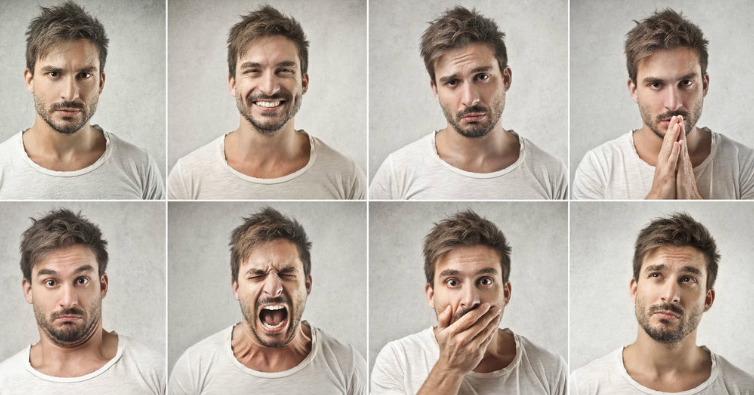

In [ ]:
imagem = cv2.imread('/content/drive/MyDrive/Projects Computing Vision/Classificação_de_Emoções/arquivo/Imagens_videos/faces_emotions.png')
cv2_imshow(imagem)

In [ ]:
deteccoes = detector_face.detectMultiScale(imagem)
deteccoes

array([[224,  35,  90,  90],
       [ 23,  41,  92,  92],
       [625,  49,  91,  91],
       [420,  43,  97,  97],
       [420, 242,  97,  97],
       [ 18, 243,  98,  98],
       [229, 242,  85,  85],
       [627, 241,  91,  91]], dtype=int32)

In [ ]:
emotions = list(dataset_teste.class_indices.keys())

1/1 [==============================] - 0s 19ms/step


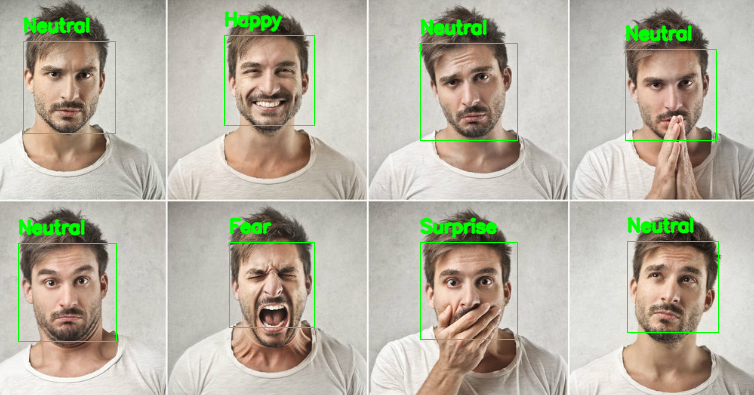

In [ ]:
for (x, y, w, h) in deteccoes:
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0,255,0), 1)
  roi = imagem[y:y + h, x:x + w]
  roi = cv2.resize(roi, (48,48))
  roi = roi / 255
  roi = np.expand_dims(roi, axis = 0)
  previsao = network_loaded.predict(roi)
  cv2.putText(imagem, emotions[np.argmax(previsao)], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)
cv2_imshow(imagem)

# Classificação de emoções em videos

In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/Projects Computing Vision/Classificação_de_Emoções/arquivo/Imagens_videos/emotions.mp4')
conectado, video = cap.read()
print(conectado, video.shape)

True (472, 844, 3)


In [ ]:
save_path = '/content/drive/MyDrive/Projects Computing Vision/Classificação_de_Emoções/arquivo/Imagens_videos/emotions_result.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 24
output_video = cv2.VideoWriter(save_path, fourcc, fps, (video.shape[1], video.shape[0]))

In [ ]:
while (cv2.waitKey(1) < 0):
  conectado, frame = cap.read()
  if not conectado:
    break

  deteccoes = detector_face.detectMultiScale(frame, scaleFactor = 1.2, minNeighbors = 5, minSize = (30,30))
  if len(deteccoes) > 0:
    for (x, y, w, h) in deteccoes:
      frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0,255,0), 2)
      roi = frame[y:y + h, x:x + w]
      roi = cv2.resize(roi, (48,48))
      roi = roi / 255
      roi = np.expand_dims(roi, axis = 0)
      previsao = network_loaded.predict(roi)

      if previsao is not None:
        resultado = np.argmax(previsao)
        cv2.putText(frame, emotions[resultado], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 1, cv2.LINE_AA)
  #cv2_imshow(frame)
  output_video.write(frame)


print('Terminou!')
output_video.release()
cv2.destroyAllWindows()